# 구글 플레이 스토어 데이터EDA

## 컬럼 설명

* App: 응용 프로그램 이름
* Category: 앱이 속한 카테고리
* Rating: 앱의 전체 사용자 등급
* Reviews: 앱에 대한 사용자 리뷰 수
* Size: 앱의 크기입니다.
* Installs: 앱에 대한 사용자 설치 수
* Type: "유료" 또는 "무료" 중 하나이다
* Price: 앱의 가격
* Genres: 앱이 속한 여러 장르
* Last Updated: 앱이 마지막으로 업데이트된 날짜
* Current Ver: 앱의 현재 버전
* Android Ver: 이 앱에는 Android 버전이 필요

## 1. 데이터 불러오기

In [1]:
# 라이브러리 호출
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 데이터 불러오기
df = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Google Play/googleplaystore.csv')
df.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [3]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10841 non-null  int64  
 1   App             10841 non-null  object 
 2   Category        10841 non-null  object 
 3   Rating          9367 non-null   float64
 4   Reviews         10841 non-null  object 
 5   Size            10841 non-null  object 
 6   Installs        10841 non-null  object 
 7   Type            10840 non-null  object 
 8   Price           10841 non-null  object 
 9   Content Rating  10840 non-null  object 
 10  Genres          10841 non-null  object 
 11  Last Updated    10841 non-null  object 
 12  Current Ver     10833 non-null  object 
 13  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.2+ MB


In [4]:
# 결측값과 Unnamed: 0 컬럼 삭제 후 새로운 데이터프레임 생성
df2 = df.dropna().drop('Unnamed: 0', axis = 1)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   object 
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1023.8+ KB


## 2. 데이터 EDA

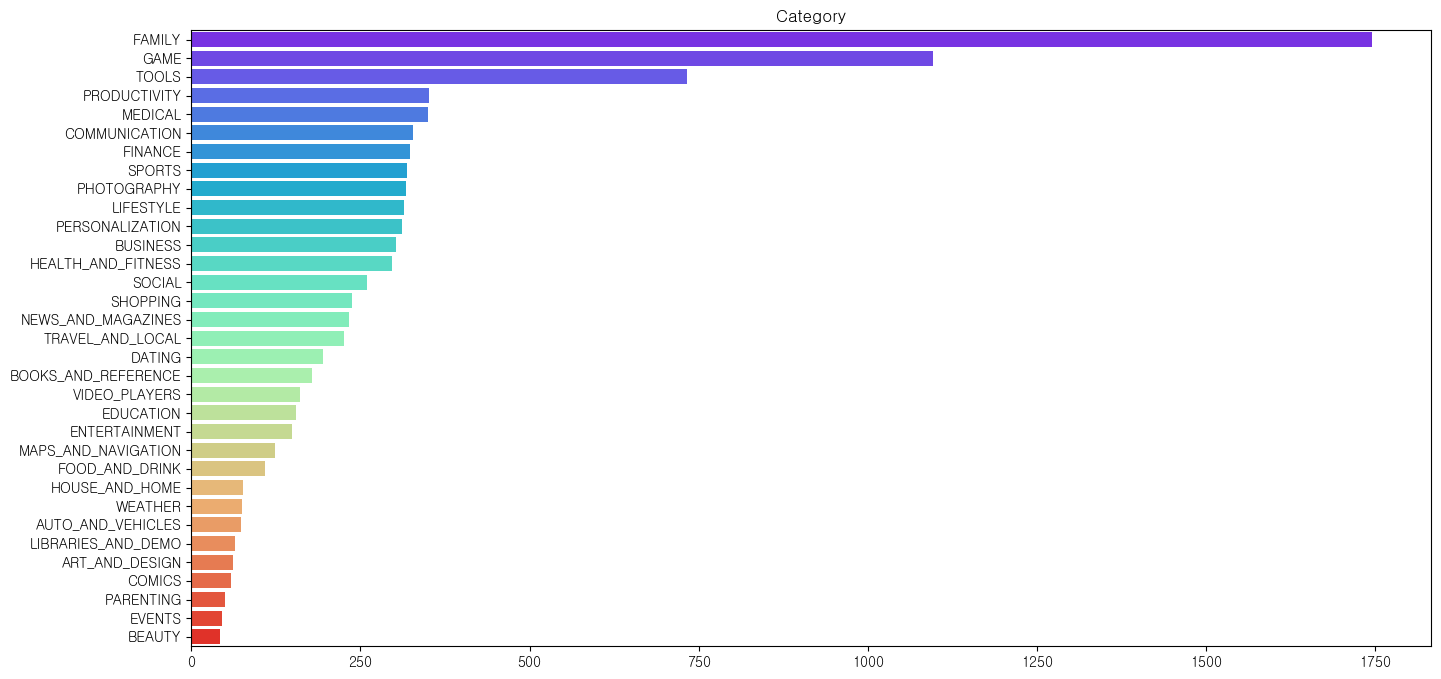

In [5]:
# 카테고리별 어플 수
counts = df2['Category'].value_counts()
plt.figure(figsize = (16, 8))
sns.barplot(x = counts.values, y = counts.index, palette = 'rainbow')
plt.title('Category')
plt.show()

* 구글 플레이스토어에 배포되어 있는 어플들의 카테고리별 분포를 확인할 수 있다.
* 'FAMILY', 'GAME', 'TOOLS'카테고리에 해당되는 어플들의 수가 압도적으로 많음을 알 수 있다.
* 반면 'PARENTING', 'EVENTS', 'BEAUTY' 카테고리의 어플들의 수는 상당히 적은데, 이와 관련하여 원인분석과 시장조사를 통해 새로운 기업의 신규 어플 진입을 시도해 볼 수 있을것이다.

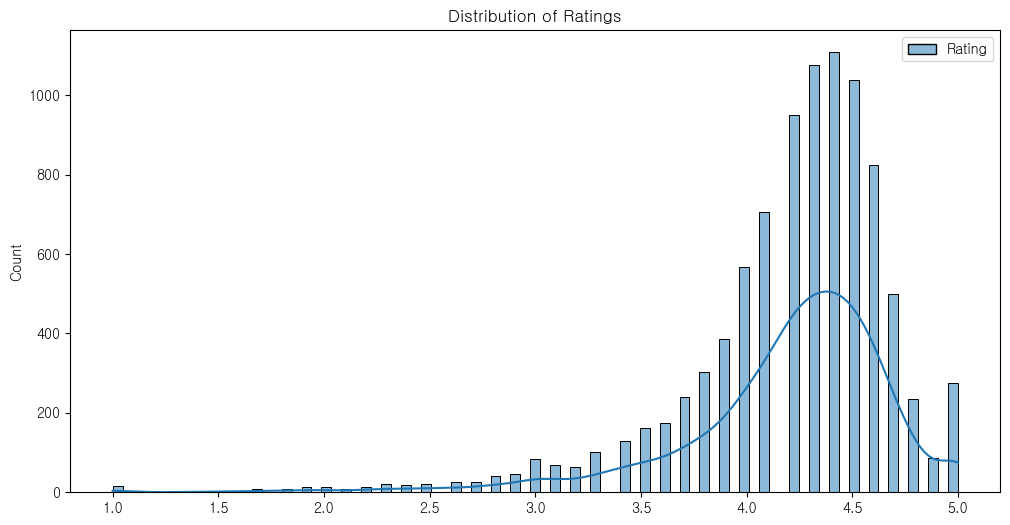

In [6]:
# 어플의 평점 분포 히스토그램
plt.figure(figsize = (12, 6))
sns.histplot(df2[['Rating']], kde = True)
plt.title('Distribution of Ratings')
plt.show()

* 어플들의 평점 분포 히스토그램을 보면 대체적으로 4.0 ~ 4.5에 집중되어 있는 것을 알 수 있다.
* 평점 5.0을 받은 어플들은 상대적으로 비중이 작은 것을 보아 어플의 특성상 개선점이 존재할 것으로 예상되어 리뷰 데이터들을 토대로 지속적인 업데이트를 필요로 함을 간접적으로 시사한다고 생각된다. 

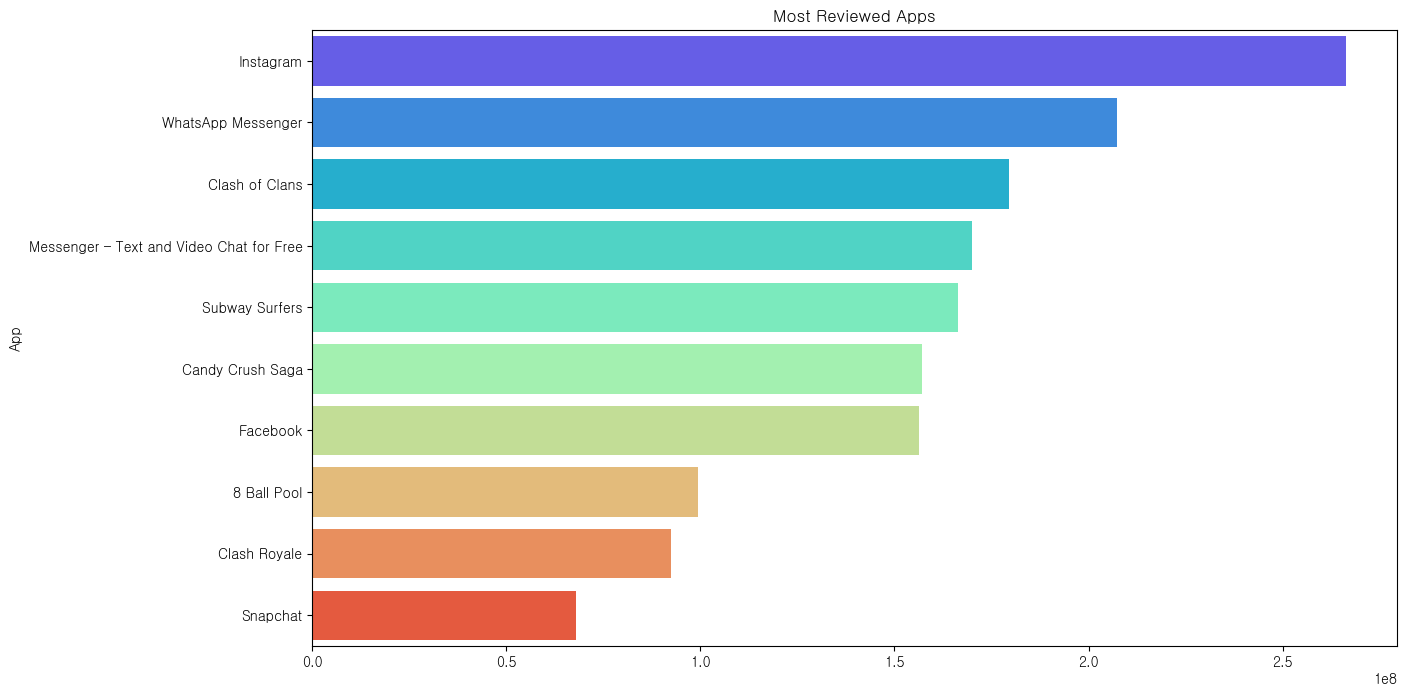

In [7]:
# 리뷰가 많이 달린 어플 막대 그래프
# 정수 변환
df2['Reviews'] = df2['Reviews'].astype(int)
review = df2[['Reviews', 'App']].groupby('App').sum().sort_values(by = 'Reviews', ascending = False).head(10)
plt.figure(figsize = (14, 8))
sns.barplot(x = review.values.reshape(10), y = review.index, palette = 'rainbow')
plt.title('Most Reviewed Apps')
plt.show()

* 구글 플레이스토어에서의 리뷰가 가장많은 어플은 인스타그램, WhatsApp Messenger, 클래시 오브 클랜 순이다.
* 상위 10개 중에 가장 낮은 비중을 차지하는 것은 스냅챗이다.

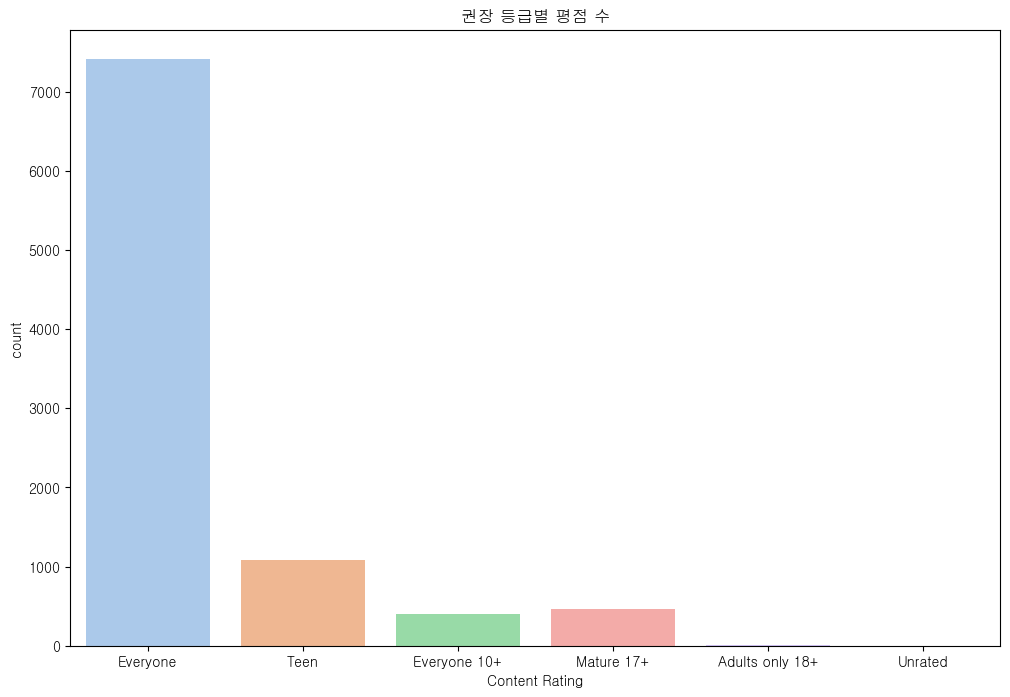

In [8]:
# 어플의 사용 권장 연령대별 평점 수
plt.figure(figsize = (12, 8))
sns.countplot(x = df2['Content Rating'], palette = 'pastel')
plt.title('권장 등급별 평점 수')
plt.show()

* '전체이용가'등급의 어플 평점 수가 압도적으로 많으며 어린이, 17세 이상등급, 10세 이상 순으로 순위를 가진다.
* 18세 이상의 성인용 콘텐츠의 평점리뷰는 상당히 저조함을 알 수 있다.

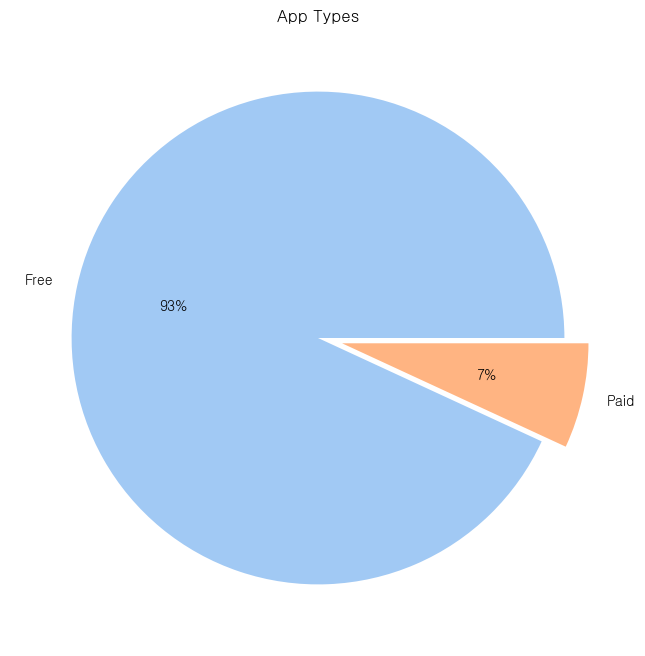

In [9]:
# 어플의 타입 시각화
sns.set_palette("pastel")
plt.figure(figsize = (8, 8))
fig = df2.groupby('Type')['Type'].count().plot(kind = 'pie', autopct = '%1.0f%%', shadow = False, explode = (0, 0.1))
fig.set_title('App Types')
fig.set_ylabel("")
plt.show()

* 어플의 93%가 무료로 다운받을 수 있으며, 나머지 7%의 어플은 다운로드 하기 위해서 결재를 해야 한다.
* 다만 게임과 편집 툴 등 특수성을 가진 어플의 경우, 무료 다운로드 이후 추가 결제가 필요할 수도 있으니 개개인의 판단에 따라 이용할 필요가 있다.

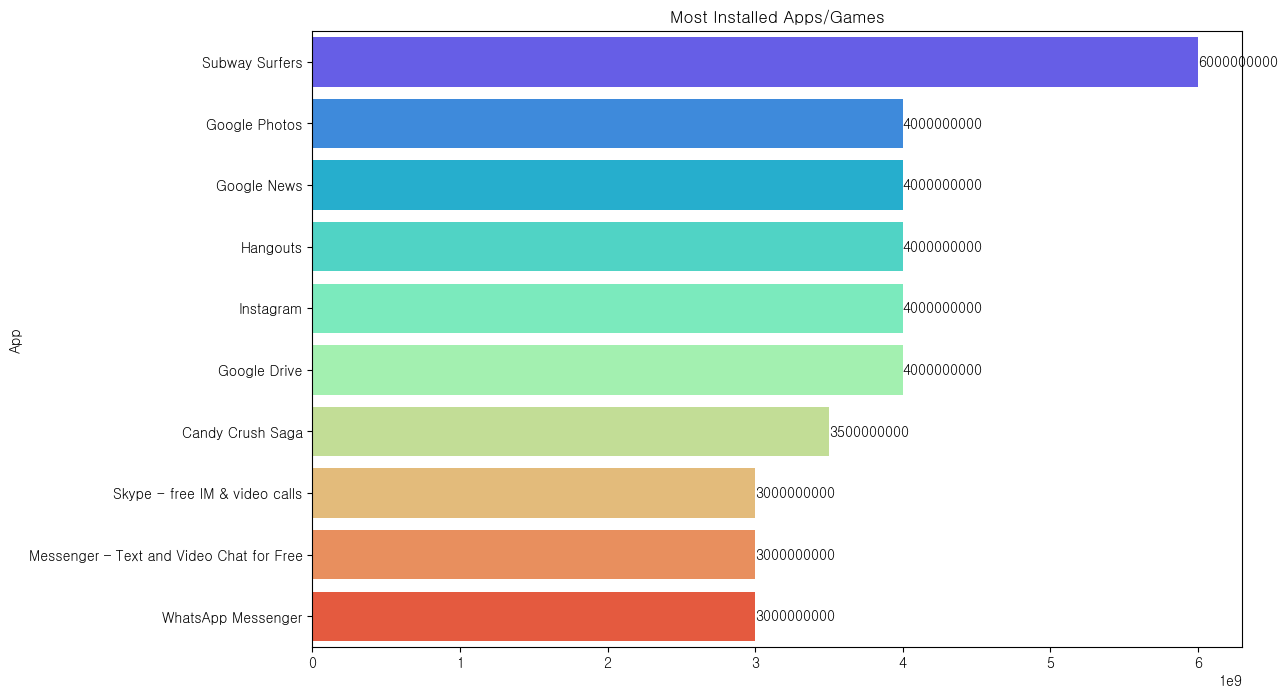

In [10]:
# 가장 많은 다운로드 수를 가진 어플
# Installs 컬럼의 데이터에 ',', '+'은 공백으로 제거해준다
df2['Installs'] = df2['Installs'].str.replace(",", "").str.replace("+", "").astype(int)
installs = df2.groupby('App')[['Installs']].sum().sort_values(by = 'Installs', ascending = False).head(10)

plt.figure(figsize = (12, 8))
ax = sns.barplot(x = installs.values.reshape(10), y = installs.index, palette = 'rainbow')
ax.set_title('Most Installed Apps/Games')
ax.bar_label(ax.containers[0], fontsize = 10, fmt = '%.f')
plt.show()

* 가장 많이 설치된 어플/게임은 서브웨이 서퍼, 구글포토, 구글뉴스 순으로 이어진다.
* 이 데이터의 경우 거시적으로 5000만 다운로드, 1억 다운로드 등 거시적인 범주로 통합하여 측정된 것이므로 간단한 시각화 자료로만 참고할 필요가 있다.

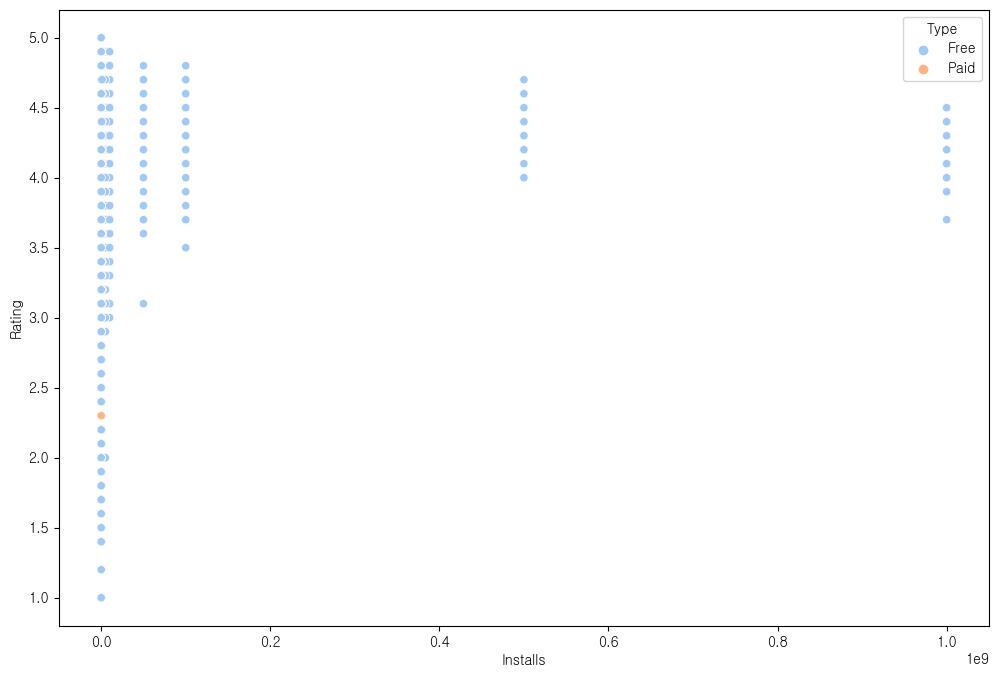

In [11]:
# 설치 수와 평점, 어플 가격간의 상관관계 산점도
plt.figure(figsize = (12, 8))
sns.scatterplot(x = df2['Installs'], y = df2['Rating'], hue = df2['Type'])
plt.show()

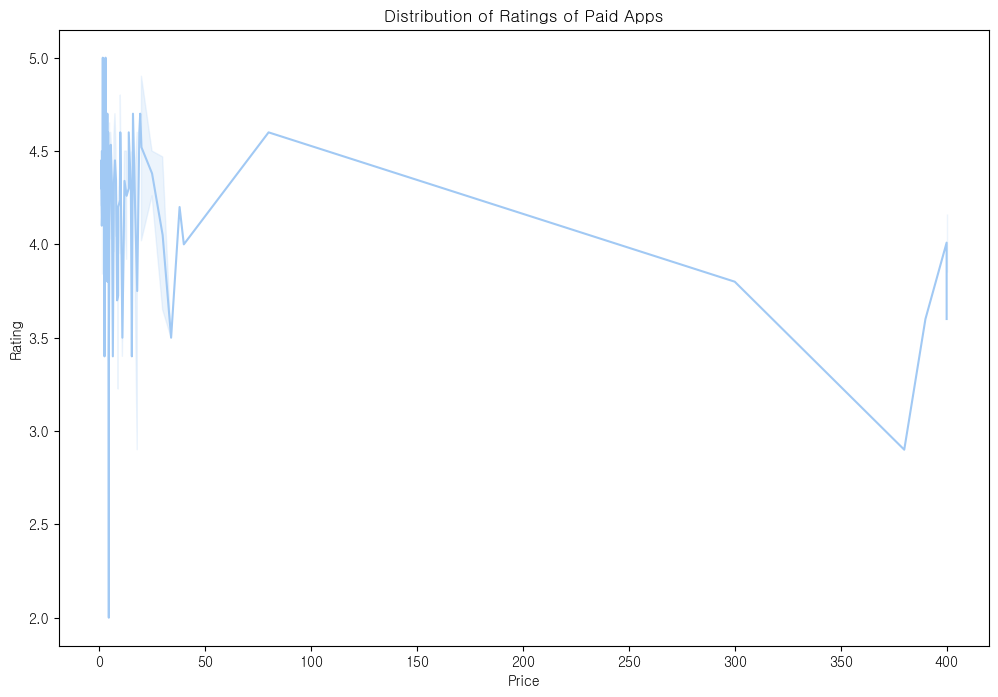

In [12]:
# 유료어플의 가격대별 평점 분포도
# 가격의 '$' 제거
df2['Price'] = df2['Price'].replace({'\$': ''}, regex = True).astype(float)
plt.figure(figsize = (12, 8))
sns.lineplot(data = df2[df2['Type'] == 'Paid'], x = 'Price', y = 'Rating')
plt.title('Distribution of Ratings of Paid Apps')
plt.show()

* 어플의 가격이 낮을수록 평점이 높고, 가격이 높을수록 대체적으로 평점이 낮아지는 것을 볼 수 있다.
* 이는 가격이 높은 어플들은 가격대비 성능에 있어 소비자들의 만족을 충분히 이끌어내지 못했다고 예상된다.
* 해당되는 어플의 평점을 회복하기 위해선 내부적으로 문제점을 파악 후 개선할 전략을 수립할 필요가 있을 것이다.

## 3. 결론

* 구글 플레이 앱스토어의 데이터를 활용하여 카테고리, 평점, 리뷰 등의 요소에 따른 다양한 EDA 결과를 도출할 수 있었다.
* 서브웨이 서퍼의 다운로드 수가 갱신되어 있지 않은 것으로 보아 비교적 오래된 데이터로 예상되는데 최근 데이터로 업데이트가 된다면 보다 다채로운 분석 결과물을 도출할 수 있을 것으로 보인다.